In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
df = pd.read_csv("allAccessions.FS_BioclimData.csv",header =[0,1], index_col=[0,1])

In [4]:
df.head()

ind                tavg                                                       \
ind                 jan    feb    mar    apr     mai     jun     jul     aug   
ind_5276 fs4_8    4.644  4.520  6.440  8.208  11.680  14.556  17.032  17.124   
ind_5279 fs3_12   4.644  4.520  6.440  8.208  11.680  14.556  17.032  17.124   
ind_5023 fs4_3    4.360  4.340  6.328  8.016  11.488  14.444  16.764  16.808   
ind_5104 fs16_12  4.360  4.340  6.328  8.016  11.488  14.444  16.764  16.808   
ind_4807 fs3_5    6.044  5.816  7.020  8.212  11.080  13.608  15.712  15.780   

ind                               ...   wind                              \
ind                  sep     oct  ...    aug    sep    oct    nov    dec   
ind_5276 fs4_8    14.676  11.304  ...  4.208  4.452  4.688  4.892  5.148   
ind_5279 fs3_12   14.676  11.304  ...  4.208  4.452  4.688  4.892  5.148   
ind_5023 fs4_3    14.276  10.684  ...  4.168  4.396  4.680  4.804  5.072   
ind_5104 fs16_12  14.276  10.684  ...  4.168  4.396  4.680  4.804  5.072   
ind_4807 fs3_5    14.020  11.372  ...  4.520  5.016  5.724  6.000  6.536   

ind                                                       
ind                  djf     mam     jja     son     ann  
ind_5276 fs4_8    5.2080  4.8227  4.2640  4.6773  4.7430  
ind_5279 fs3_12   5.2080  4.8227  4.2640  4.6773  4.7430  
ind_5023 fs4_3    5.2493  4.8480  4.2253  4.6267  4.7373  
ind_5104 fs16_12  5.2493  4.8480  4.2253  4.6267  4.7373  
ind_4807 fs3_5    6.5187  5.6627  4.6787  5.5800  5.6100  

[5 rows x 119 columns]

In [5]:
df.columns = df.columns.rename('env', level=0)
df.columns = df.columns.rename('fs', level =1)

In [6]:
df.head()

env                tavg                                                       \
fs                  jan    feb    mar    apr     mai     jun     jul     aug   
ind_5276 fs4_8    4.644  4.520  6.440  8.208  11.680  14.556  17.032  17.124   
ind_5279 fs3_12   4.644  4.520  6.440  8.208  11.680  14.556  17.032  17.124   
ind_5023 fs4_3    4.360  4.340  6.328  8.016  11.488  14.444  16.764  16.808   
ind_5104 fs16_12  4.360  4.340  6.328  8.016  11.488  14.444  16.764  16.808   
ind_4807 fs3_5    6.044  5.816  7.020  8.212  11.080  13.608  15.712  15.780   

env                               ...   wind                              \
fs                   sep     oct  ...    aug    sep    oct    nov    dec   
ind_5276 fs4_8    14.676  11.304  ...  4.208  4.452  4.688  4.892  5.148   
ind_5279 fs3_12   14.676  11.304  ...  4.208  4.452  4.688  4.892  5.148   
ind_5023 fs4_3    14.276  10.684  ...  4.168  4.396  4.680  4.804  5.072   
ind_5104 fs16_12  14.276  10.684  ...  4.168  4.396  4.680  4.804  5.072   
ind_4807 fs3_5    14.020  11.372  ...  4.520  5.016  5.724  6.000  6.536   

env                                                       
fs                   djf     mam     jja     son     ann  
ind_5276 fs4_8    5.2080  4.8227  4.2640  4.6773  4.7430  
ind_5279 fs3_12   5.2080  4.8227  4.2640  4.6773  4.7430  
ind_5023 fs4_3    5.2493  4.8480  4.2253  4.6267  4.7373  
ind_5104 fs16_12  5.2493  4.8480  4.2253  4.6267  4.7373  
ind_4807 fs3_5    6.5187  5.6627  4.6787  5.5800  5.6100  

[5 rows x 119 columns]

In [7]:
meanEnv = df.groupby(level=[1]).mean()

In [9]:
d = {idx:gp.xs(idx, level=0, axis=1) for idx, gp in meanEnv.groupby(level=0, axis=1)}

In [10]:
dTavg = d['tavg'].iloc[:,0:12].mean(axis=1)

In [11]:
dPrec = d['prec'].iloc[:,0:12].mean(axis=1)
dVapr =d['vapr'].iloc[:,0:12].mean(axis=1)
dSrad=d['srad'].iloc[:,0:12].mean(axis=1)

In [12]:
dPrecTavg = pd.DataFrame({'prec':dPrec, 'tavg':dTavg,'vapr':dVapr,'srad':dSrad})

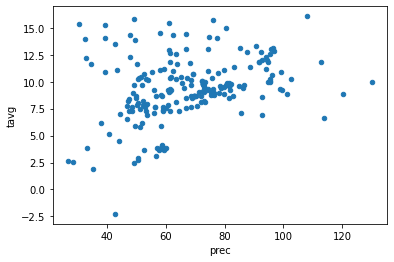

In [13]:
dPrecTavg.plot('prec', 'tavg',kind ='scatter')

In [14]:
dPrecTavg['group']=dPrecTavg.index

In [15]:
dPrecTavg['group']= dPrecTavg['group'].apply(lambda x: 'nAm' if 'newGroup' in x else x)

In [16]:
dPrecTavg['group']= dPrecTavg['group'].apply(lambda x: 'fs' if 'fs' in x else x)

In [17]:
dPrecTavg['cluster']=dPrecTavg.index

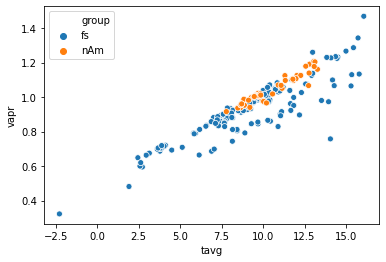

In [18]:
sns.scatterplot('tavg','vapr', data=dPrecTavg, hue='group')

In [19]:
dPrecTavg.to_csv("envVariablesMean_group_cluster.txt", sep='\t', float_format="%.4f", index=None,)

In [23]:
os.system('cp envVariablesMean_group_cluster.txt envVariablesMean_group_clusterAbb.txt')
os.system('for i in {1..21}; do sed -i "s/fs${i}_.*/fs${i}/g" envVariablesMean_group_clusterAbb.txt ; done')

0

In [25]:
!for i in {1..21}; do sed -i "s/fs${i}_.*/fs${i}/g" envVariablesMean_group_clusterAbb.txt ; done

In [97]:
df_pca = pd.read_csv("envVariablesMean_group_clusterAbb.txt",sep="\t")
df_pca.head()

,prec,tavg,vapr,srad,group,cluster
0,58.0167,14.5085,1.2318,14831.4611,fs,fs10
1,61.0333,12.9267,1.1254,14880.5500,fs,fs10
2,92.7262,6.8981,0.6858,14631.1786,fs,fs10
3,62.3750,11.0286,0.9005,15169.5938,fs,fs10
4,85.5000,7.0590,0.6983,15210.8333,fs,fs10


In [98]:
#srad was removed
from sklearn.preprocessing import StandardScaler
features =['prec','tavg','vapr',]

x = df_pca.loc[:,features].values
y = df_pca.loc[:,['cluster']].values
#standardize x
x = StandardScaler().fit_transform(x)

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [100]:
finalDf=pd.concat([principalDf,df_pca[['group','cluster']]], axis=1)

In [101]:
finalDf

,PC1,PC2,group,cluster
0,-2.095829,-1.547319,fs,fs10
1,-1.372870,-1.043024,fs,fs10
2,1.053288,1.910468,fs,fs10
3,-0.033265,-0.427466,fs,fs10
4,1.135577,1.518311,fs,fs10
...,...,...,...,...
210,-0.915225,1.220491,nAm,newGroupMAAA
211,0.395001,0.417847,nAm,newGroupMNF
212,-1.449068,0.913275,nAm,newGroupNYBG
213,-1.173165,0.200965,nAm,newGroupOHOS


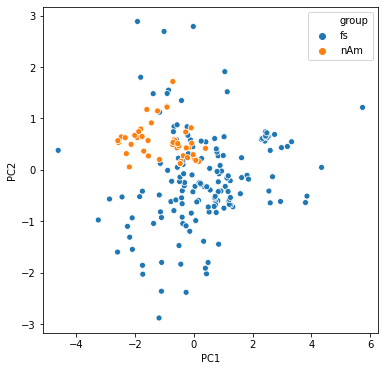

In [102]:
plt.subplots(figsize=(6,6))
sns.scatterplot("PC1","PC2", data=finalDf, hue="group");


In [103]:
pca.explained_variance_ratio_

array([0.71818045, 0.25302252])

### https://pair-code.github.io/understanding-umap/
### https://www.youtube.com/watch?v=YPJQydzTLwQ

In [119]:
import umap
#here run umap with different random_state and in second umap I also increased min_dist from default 0.1 to 0.4 to
# see effect on spacing out of points
reducer = umap.UMAP(random_state=4321)
reducer2 = umap.UMAP(random_state=1234, min_dist=0.4)

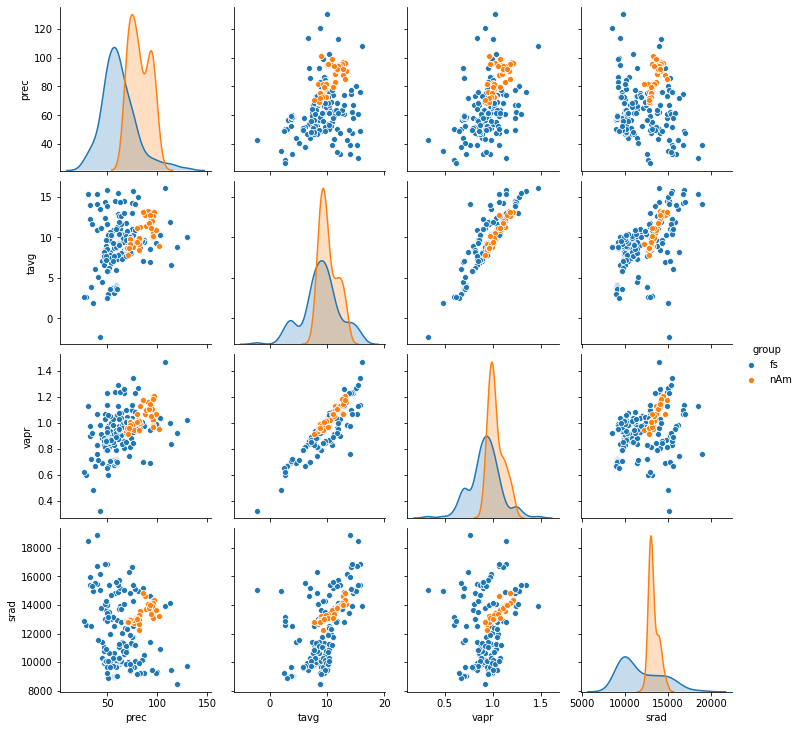

In [121]:
#variables pairplot colored with group they belong to (nAm vs all Afr-Eur-Asian)
sns.pairplot(df_pca, hue='group')

In [122]:

df_pca_data = df_pca[
    [
        'prec',
        'tavg',
        'vapr',
    ]
].values

In [123]:
scaled_df_pca_data = StandardScaler().fit_transform(df_pca_data)

In [124]:
embedding = reducer.fit_transform(scaled_df_pca_data)

In [125]:
embedding2 = reducer2.fit_transform(scaled_df_pca_data)

In [126]:
embedding.shape

(215, 2)

In [127]:
embeddingDf = pd.DataFrame(data = embedding, columns=['emb1','emb2'] )

In [128]:
embedding2Df = pd.DataFrame(data=embedding2, columns=['emb1','emb2'])

In [129]:
finalEmbDf=pd.concat([embeddingDf,df_pca[['group','cluster']]], axis=1)
finalEmbDf['AmGrouped_cluster']= finalEmbDf['cluster'].apply(lambda x: 'nAm' if 'newGroup' in x else x)

In [130]:
finalEmbDf2=pd.concat([embedding2Df,df_pca[['group','cluster']]], axis=1)
finalEmbDf2['AmGrouped_cluster']= finalEmbDf2['cluster'].apply(lambda x: 'nAm' if 'newGroup' in x else x)

In [131]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

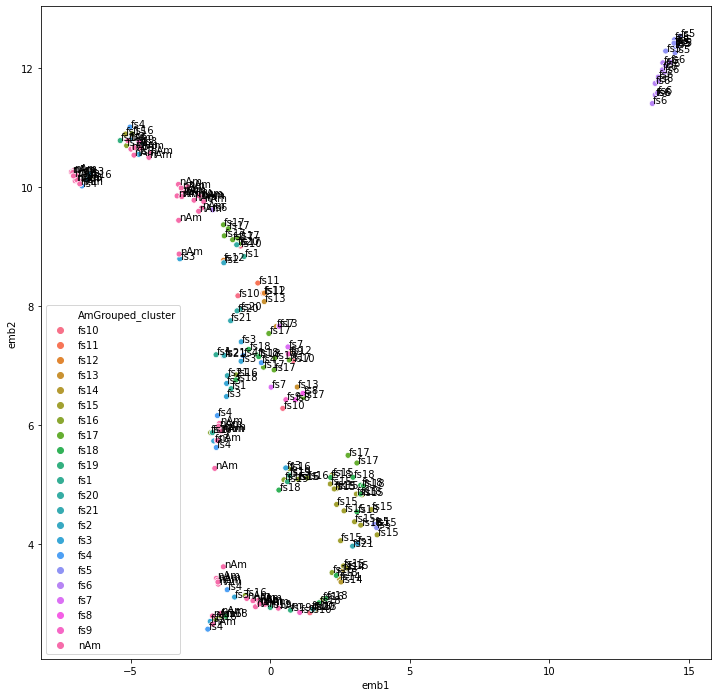

In [132]:
plt.subplots(figsize=(12,12))
sns.scatterplot("emb1","emb2", data=finalEmbDf, hue="AmGrouped_cluster");
label_point(finalEmbDf.emb1,finalEmbDf.emb2,finalEmbDf.AmGrouped_cluster,plt.gca())

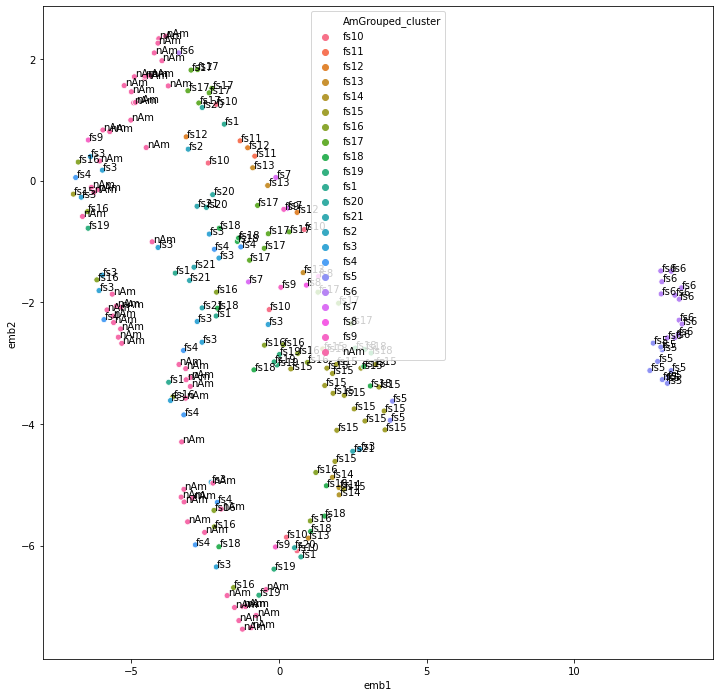

In [133]:
plt.subplots(figsize=(12,12))
sns.scatterplot("emb1","emb2", data=finalEmbDf2, hue="AmGrouped_cluster");
label_point(finalEmbDf2.emb1,finalEmbDf2.emb2,finalEmbDf2.AmGrouped_cluster,plt.gca())

In [134]:
finalEmbDf.to_csv("umapEmbeddingOutput.txt", sep='\t', float_format="%.4f", index=None,)

In [135]:
!pwd

/mnt/bigdisk/work/northAmericanArabidopsis/evolHistory/bioclim/stat-rethink2-pymc3


In [136]:
os.system("paste envVariablesMean_group_cluster.txt umapEmbeddingOutput.txt |awk '{print $6,$6,$9,$7,$8}'|sed \"s/ /\t/g\" > umapEmbeddingRegionsOutput.txt")

0

In [137]:
os.system(" while read a b ; do sed -i \"s/\<${a}\>/${b}/g\" umapEmbeddingRegionsOutput.txt ; done < regionsClustersEd.txt ")
os.system("sed -i \"/newGroupCol0/d\" umapEmbeddingRegionsOutput.txt")

0

In [138]:
#####Versions of libraries used########
%reload_ext watermark
%watermark -n -u -v -iv -w

numpy   1.19.1
pandas  1.1.1
umap    0.4.6
seaborn 0.10.1
last updated: Mon Oct 26 2020 

CPython 3.8.5
IPython 7.18.1
watermark 2.0.2
